### Dimensionality Reduction:
* This is used to reduce the number of features in our data.

**Why is dimensionality Reduction?**

* To save the memeory space.
* To avoid the complexity of the execution (or) less features makes the computation easy.
* some algorithms won't perform well and gives less effieciency whwn we feed huge data,to avoid these we go for dimensionality reduction.
* For removing the multicolinearity features.

**Techniques in dimensionality Reduction:**

* There are two techniques in applying dimensionality reduction.
    * feature selection
    * variable selection

#### Scatter plot for 100 values:

<img src = "https://cdn.analyticsvidhya.com/wp-content/uploads/2018/08/Screenshot-from-2018-08-09-19-14-31.png">

##### Plot for the freatures kgs and pounds:

<img src = "https://cdn.analyticsvidhya.com/wp-content/uploads/2018/08/Screenshot-from-2018-07-26-13-06-35.png">

##### combining both features into one:

<img src = "https://cdn.analyticsvidhya.com/wp-content/uploads/2018/08/Screenshot-from-2018-07-26-13-51-52.png">

**Dimensionality Reduction methods**:


**Missing values Ratio**:

In [2]:
### importing the libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
## Reading the dataset:

train = pd.read_csv("https://raw.githubusercontent.com/AP-Skill-Development-Corporation/Tirumala-ML/main/Day-12/train_v9rqX0R.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [6]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
train.isnull().sum()/len(train)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [8]:
## saving missing values in a varible:

a = train.isnull().sum()/len(train)*100

### saving the column names in a variable

variables = train.columns
v = []
for i in range(len(variables)):
    if a[i] <= 20:
        v.append(variables[i])

In [9]:
v

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

**Low variance Filter**:

In [10]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
train['Item_Weight'].fillna(train['Item_Weight'].median(),inplace = True)
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0],inplace = True)

In [12]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
train.var()

Item_Weight                  1.786956e+01
Item_Visibility              2.662335e-03
Item_MRP                     3.878184e+03
Outlet_Establishment_Year    7.008637e+01
Item_Outlet_Sales            2.912141e+06
dtype: float64

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [15]:
numeric = train[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']]
var = numeric.var()
numeric = numeric.columns
variable = []
for i in range(len(var)):
    if var[i] >= 10:
        variable.append(numeric[i])

In [16]:
variable

['Item_Weight', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

**High correlation Filter**:

* similarity of the features

In [17]:
data = train.drop('Item_Outlet_Sales',1)

In [18]:
data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.014168,0.024951,0.007739
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834
Item_MRP,0.024951,-0.001315,1.000000,0.005020
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000


**Random Forest**:


In [19]:
from sklearn.ensemble  import RandomForestRegressor
data = data.drop(["Item_Identifier","Outlet_Identifier"],axis = 1)
model = RandomForestRegressor(random_state = 1,max_depth = 10)
data = pd.get_dummies(data)
model.fit(data,train.Item_Outlet_Sales)

C:\Users\Niharikaa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [20]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

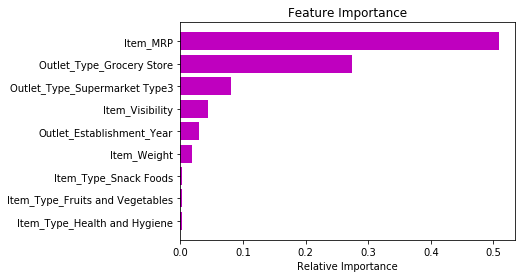

In [21]:
features = data.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]
plt.title("Feature Importance")
plt.barh(range(len(indices)),importances[indices],color = 'm',align = "center")
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [23]:
from sklearn.feature_selection import SelectFromModel
feature = SelectFromModel(model)
Fit = feature.fit_transform(data,train.Item_Outlet_Sales)

**Backward Feature Elimination**:

1 2 3 4  ---- columns in the dataset

1 2 3 

1 2 4

1 3 4

2 3 4

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
lreg = LinearRegression()
rfe = RFE(lreg,10)
rfe = rfe.fit_transform(data,train.Item_Outlet_Sales)

**Forward Feature Elimination**:

In [28]:
from sklearn.feature_selection import f_regression
ffs = f_regression(data,train.Item_Outlet_Sales)


In [33]:
variable = []
for i in range(len(data.columns)-1):
    if ffs[0][i] >= 10:
        variable.append(data.columns[i])

In [34]:
variable

['Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Type_Baking Goods',
 'Outlet_Size_Medium',
 'Outlet_Size_Small',
 'Outlet_Location_Type_Tier 1',
 'Outlet_Location_Type_Tier 2',
 'Outlet_Location_Type_Tier 3',
 'Outlet_Type_Grocery Store',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Type_Supermarket Type2']